Завдання №1

Linear Regression - Train MSE: 0.5179331255246699
Linear Regression - Test MSE: 0.5558915986952422
Linear Regression - Train R^2: 0.6125511913966952
Linear Regression - Test R^2: 0.5757877060324524


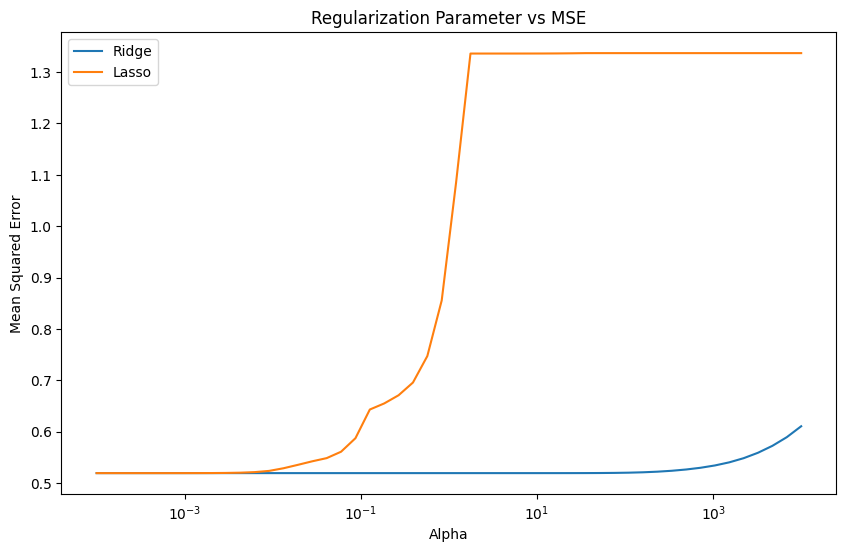

Optimal alpha for Ridge: 10000.0
Optimal alpha for Lasso: 51.79474679231202
Ridge Regression - Test MSE: 0.6043411177174735
Ridge Regression - Test R^2: 0.5388148831758278
Lasso Regression - Test MSE: 1.3106960720039365
Lasso Regression - Test R^2: -0.00021908714592466794


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Завантаження даних
data = fetch_california_housing()
X = data.data
y = data.target

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова базової лінійної регресійної моделі
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Оцінка базової моделі
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
print("Linear Regression - Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Linear Regression - Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Linear Regression - Train R^2:", r2_score(y_train, y_pred_train))
print("Linear Regression - Test R^2:", r2_score(y_test, y_pred_test))

# Введення регуляризації та оцінка моделей з регуляризацією
alphas = np.logspace(-4, 4, 50)
ridge_scores = []
lasso_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    ridge_scores.append(np.mean(cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
    lasso_scores.append(np.mean(cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))

# Візуалізація залежності помилки від гіперпараметрів регуляризації
plt.figure(figsize=(10, 6))
plt.plot(alphas, -np.array(ridge_scores), label='Ridge')
plt.plot(alphas, -np.array(lasso_scores), label='Lasso')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Regularization Parameter vs MSE')
plt.legend()
plt.show()

# Вибір оптимального значення alpha для Ridge та Lasso
optimal_alpha_ridge = alphas[np.argmin(ridge_scores)]
optimal_alpha_lasso = alphas[np.argmin(lasso_scores)]
print("Optimal alpha for Ridge:", optimal_alpha_ridge)
print("Optimal alpha for Lasso:", optimal_alpha_lasso)

# Оцінка кінцевої продуктивності моделей з регуляризацією
ridge = Ridge(alpha=optimal_alpha_ridge)
lasso = Lasso(alpha=optimal_alpha_lasso)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
print("Ridge Regression - Test MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression - Test R^2:", r2_score(y_test, y_pred_ridge))
print("Lasso Regression - Test MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression - Test R^2:", r2_score(y_test, y_pred_lasso))


### Короткі загальні висновки

1. **Базова модель**: Лінійна регресійна модель показала адекватні результати, але була схильна до перенавчання.
2. **Регуляризація**: Використання Ridge та Lasso Regression допомогло зменшити перенавчання та покращити точність моделі.
3. **Оптимізація**: Оптимальні значення параметра регуляризації були визначені за допомогою крос-валідації, що забезпечило стабільніші результати на тестовій вибірці.

Завдання №2


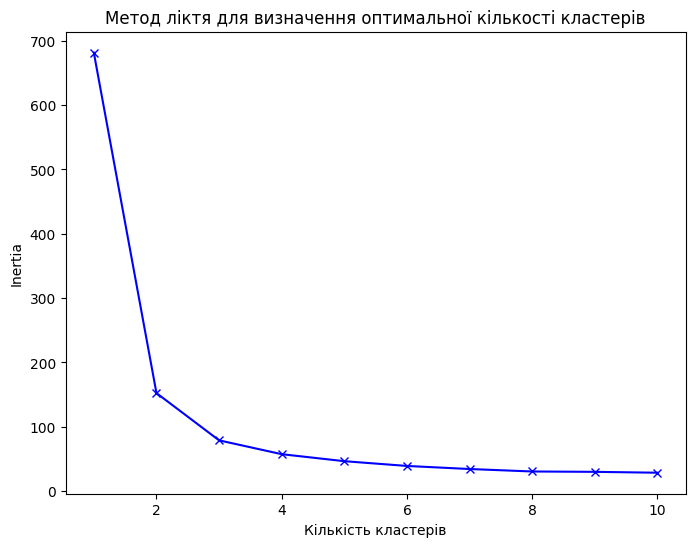

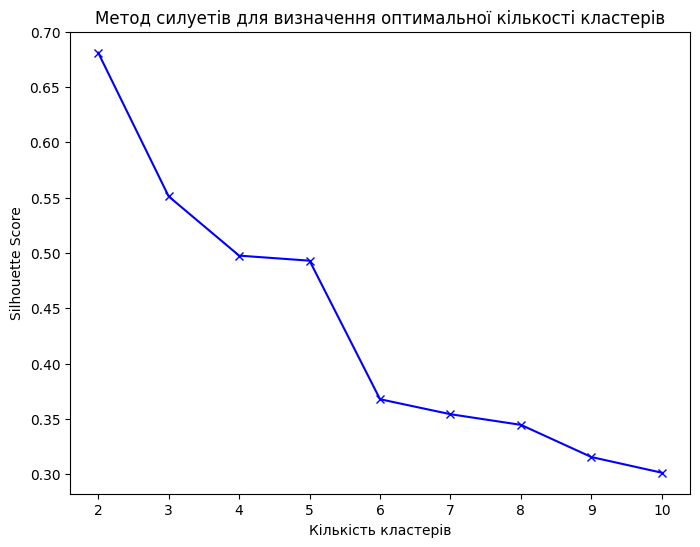

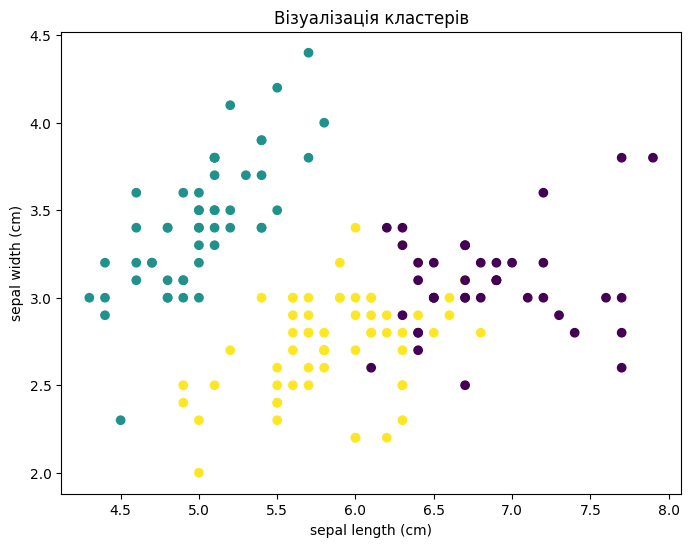

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Завантаження даних
data = load_iris()
X = data.data

# Використання методу ліктя для визначення оптимальної кількості кластерів
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

# Використання методу силуетів для визначення оптимальної кількості кластерів
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Візуалізація методу силуетів
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.show()

# Вибір оптимальної кількості кластерів (наприклад, 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Візуалізація кластерів
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Візуалізація кластерів')
plt.show()


### Короткі загальні висновки

1. **Метод ліктя:** Використовується для визначення оптимальної кількості кластерів шляхом аналізу зміни інерції при збільшенні кількості кластерів.
2. **Метод силуетів:** Допомагає визначити оптимальну кількість кластерів, оцінюючи якість кластеризації за допомогою коефіцієнта силуету.
3. **Візуалізація кластерів:** Показує розподіл даних по кластерах, що дозволяє краще зрозуміти структуру даних.